# NLTK Text Corpora

## Gutenberg Corpus

In [70]:
from nltk.corpus import gutenberg

In [71]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [72]:
from tqdm import tqdm_notebook
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 7)
import seaborn as sns
sns.set()

### Calculate Text Specifica

In [31]:
t = tqdm_notebook(gutenberg.fileids())
result = []
for fid in t:
    t.set_description(fid)
    n_chars = len(gutenberg.raw(fid))
    n_words = len(gutenberg.words(fid))
    n_sents = len(gutenberg.sents(fid))
    n_vocab = len(set([w.lower() for w in gutenberg.words(fid)]))
    row = [int(n_chars/n_words), int(n_words/n_sents), int(n_words/n_vocab), fid]
    result.append(row)
df_result = pd.DataFrame.from_records(result, columns=["Chars/Words", "Words/Sents", "Words/Vocab", "Text"])

HBox(children=(IntProgress(value=0, max=18), HTML(value='')))

### Plot Text Specifica

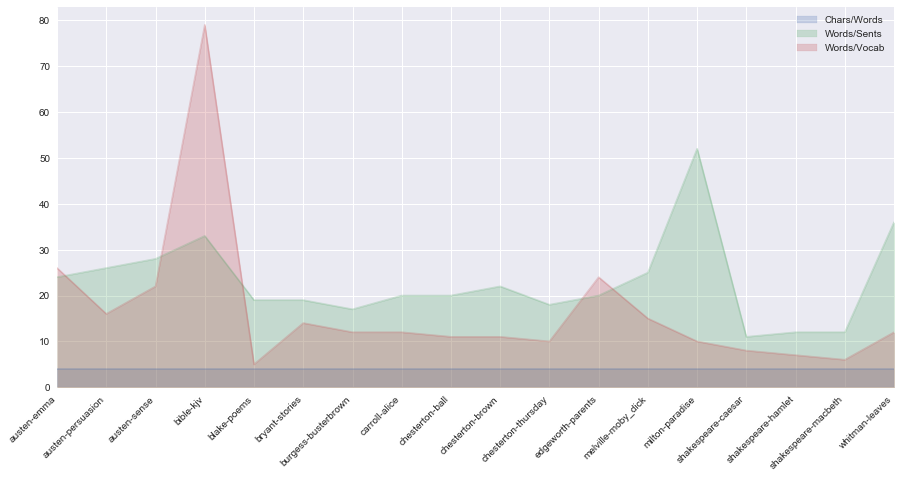

In [81]:
ax = df_result.iloc[:, [0, 1, 2]].plot.area(alpha=.25, stacked=False)
ax.set_xticks(df_result.index)
ax.set_xticklabels([t[:-4] for t in df_result["Text"]], rotation=45, ha="right");

### Web and Chat Text

In [83]:
from nltk.corpus import nps_chat

In [95]:
nps_chat.fileids()

['10-19-20s_706posts.xml',
 '10-19-30s_705posts.xml',
 '10-19-40s_686posts.xml',
 '10-19-adults_706posts.xml',
 '10-24-40s_706posts.xml',
 '10-26-teens_706posts.xml',
 '11-06-adults_706posts.xml',
 '11-08-20s_705posts.xml',
 '11-08-40s_706posts.xml',
 '11-08-adults_705posts.xml',
 '11-08-teens_706posts.xml',
 '11-09-20s_706posts.xml',
 '11-09-40s_706posts.xml',
 '11-09-adults_706posts.xml',
 '11-09-teens_706posts.xml']

In [84]:
chatroom = nps_chat.posts("10-19-20s_706posts.xml")

In [88]:
print(chatroom[123])

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']


### Brown Corpus

In [89]:
from nltk.corpus import brown

In [98]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [97]:
brown.sents(categories="humor")

[['It', 'was', 'among', 'these', 'that', 'Hinkle', 'identified', 'a', 'photograph', 'of', 'Barco', '!', '!'], ['For', 'it', 'seems', 'that', 'Barco', ',', 'fancying', 'himself', 'a', "ladies'", 'man', '(', 'and', 'why', 'not', ',', 'after', 'seven', 'marriages', '?', '?'], ...]

In [99]:
from nltk import ConditionalFreqDist

In [101]:
cndf = ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [113]:
genres = ["adventure", "fiction", "hobbies", "learned"]
modals = ["can", "may", "would", "could"]

In [114]:
cndf.tabulate(conditions=genres, samples=modal)

            can   may would could 
adventure    46     5   191   151 
  fiction    37     8   287   166 
  hobbies   268   131    78    58 
  learned   365   324   319   159 


### Reuters

In [156]:
from nltk.corpus import reuters

In [161]:
reuters.fileids()[:10]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

In [162]:
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

In [164]:
reuters.words(fileids=reuters.fileids()[:10])[:20]

['ASIAN',
 'EXPORTERS',
 'FEAR',
 'DAMAGE',
 'FROM',
 'U',
 '.',
 'S',
 '.-',
 'JAPAN',
 'RIFT',
 'Mounting',
 'trade',
 'friction',
 'between',
 'the',
 'U',
 '.',
 'S',
 '.']

In [165]:
reuters.words(categories=reuters.categories()[:10])[:20]

['INDONESIAN',
 'COMMODITY',
 'EXCHANGE',
 'MAY',
 'EXPAND',
 'The',
 'Indonesian',
 'Commodity',
 'Exchange',
 'is',
 'likely',
 'to',
 'start',
 'trading',
 'in',
 'at',
 'least',
 'one',
 'new',
 'commodity']

### Inauguration Corpus

In [166]:
from nltk.corpus import inaugural

In [168]:
inaugural.fileids()[:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [169]:
import re

In [175]:
# getting all presidents
print(re.findall(r'-(\w*)\.',' '.join(inaugural.fileids())))

['Washington', 'Washington', 'Adams', 'Jefferson', 'Jefferson', 'Madison', 'Madison', 'Monroe', 'Monroe', 'Adams', 'Jackson', 'Jackson', 'VanBuren', 'Harrison', 'Polk', 'Taylor', 'Pierce', 'Buchanan', 'Lincoln', 'Lincoln', 'Grant', 'Grant', 'Hayes', 'Garfield', 'Cleveland', 'Harrison', 'Cleveland', 'McKinley', 'McKinley', 'Roosevelt', 'Taft', 'Wilson', 'Wilson', 'Harding', 'Coolidge', 'Hoover', 'Roosevelt', 'Roosevelt', 'Roosevelt', 'Roosevelt', 'Truman', 'Eisenhower', 'Eisenhower', 'Kennedy', 'Johnson', 'Nixon', 'Nixon', 'Carter', 'Reagan', 'Reagan', 'Bush', 'Clinton', 'Clinton', 'Bush', 'Bush', 'Obama']


In [176]:
# getting all years
print(re.findall(r'\d{4}',' '.join(inaugural.fileids())))

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009']
